# Assignment 10
***

# 과제 정의
***

Build a binary classifier for each digit against all the other digits at MNIST dataset.

Let x = (x_1, x_2, ... , x_m) be a vector representing an image in the dataset.

The prediction function f_d(x; w) is defined by the linear combination of data (1, x) and the model parameter w for each digit d :
f_d(x; w) = w_0 * 1 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m 
where w = (w_0, w_1, ... , w_m)

The prediction function f_d(x; w) should have the following values:
f_d(x; w) = +1 if label(x) = d
f_d(x; w) = -1 if label(x) is not d

The optimal model parameter w is obtained by minimizing the following objective function for each digit d :
\sum_i ( f_d(x^(i); w) - y^(i) )^2

and the label of input x is given by:

argmax_d f_d(x; w)

1. Compute an optimal model parameter using the training dataset for each classifier f_d(x, w)
2. Compute (1) true positive rate, (2) error rate using (1) training dataset and (2) testing dataset.

---
### 모듈 정의

In [44]:
import numpy as np
import collections
import matplotlib.pyplot as plt

---

## 1. Compute an optimal model parameter using the training dataset for each classifier f_d(x, w)

In [45]:
file_data   = "mnist_train.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images


def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)


# list_label  = np.empty(num_image, dtype=int)
list_label = []
int_data = []
int_data_y = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
X = dict()
for line in data:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    im_vector = np.insert(im_vector, 0, 1)
    int_data.append(im_vector)
    list_label.append(int(label))
    for x in range(0,10):
        if x == int(label):
            int_data_y[x].append(1.0)
        else:
            int_data_y[x].append(-1.0);
    count += 1

xn = np.array(int_data,dtype=float)
for i in range(0,10):
    X[i] = np.dot(np.linalg.pinv(xn) , np.array(int_data_y[i],dtype=float))
print(X)

{0: array([-6.84406870e-01,  1.02756547e-12, -2.53897628e-12, -1.43117440e-12,
       -8.09054705e-13, -1.00663532e-12, -2.86102582e-12, -1.32965371e-12,
       -7.89867287e-13, -1.49647371e-12,  4.59362118e-13,  7.43197493e-13,
        1.89601442e-12,  1.53458664e-01,  1.98220986e-01, -1.53345669e-01,
       -6.38940288e-03,  4.47361378e-12, -1.15733488e-12,  9.92574581e-13,
        6.00965476e-14,  1.85045849e-12,  1.29649017e-12,  4.87411594e-15,
        2.31356154e-12,  5.71223233e-14, -2.14432285e-12,  2.01999570e-12,
        7.60771616e-13, -1.56596542e-13,  9.99917224e-13, -2.31901119e-12,
        7.25859287e-15, -4.06289060e+00,  1.05099744e+00,  1.23101922e-01,
        2.11306669e-01,  6.51508445e-02,  2.55392530e-03,  5.52498152e-02,
        1.15990558e-01, -7.23390275e-02,  2.72683304e-01, -1.63118357e-01,
        6.19145739e-02,  3.85382309e-05,  7.70688345e-02, -6.15820985e-02,
        1.52778049e-02,  8.53863822e-02, -1.41982541e-01,  2.38270481e-01,
        3.58333722e-0

## 2. Compute true positive rate, error rate using training dataset
### - 예측한 label (argmax)과 실제 이미지를 비교. (50 이하만)

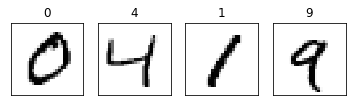

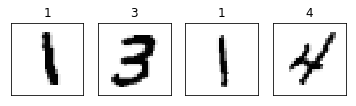

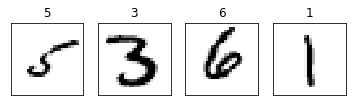

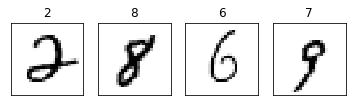

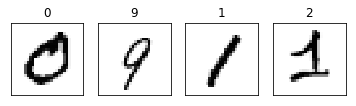

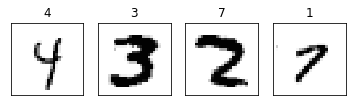

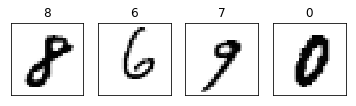

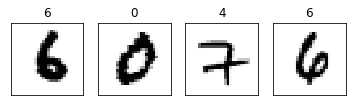

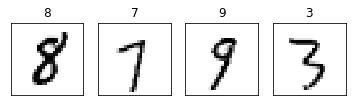

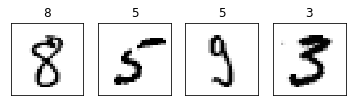

In [46]:
count = 0
tp = 0
error = 0
for x in range(len(xn)):
    f1 = plt.figure(1)
    argmax = []
    for i in range(0,10):
        argmax.append(np.dot(xn[x],X[i]))
    label       = argmax.index(max(argmax))
    if x < 50:
        im_vector   =  np.delete(xn[x], 0)
        im_matrix   = im_vector.reshape((size_row, size_col))
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

        count = count + 1

        if count == 1:
            plt.subplot(1, 4, 1)
        elif count == 2:
            plt.subplot(1, 4, 2)
        elif count == 3:
            plt.subplot(1, 4, 3)
        elif count == 4:
            plt.subplot(1, 4, 4)
        elif count == 5:
            plt.show()
            count = 0
    
    if list_label[x] == label:
        tp = tp + 1
    else:
        error = error + 1
    




In [47]:
print("true positive rate :" + str(tp/num_image))
print("error rate : " + str(error/num_image))

true positive rate :0.8577166666666667
error rate : 0.14228333333333334


## 2. Compute true positive rate, error rate using testing dataset
### - 예측한 label (argmax)과 실제 이미지를 비교. (50 이하만)

In [48]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images


def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)


# list_label  = np.empty(num_image, dtype=int)
list_label = []
int_data = []
for line in data:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    im_vector = np.insert(im_vector, 0, 1)
    int_data.append(im_vector)
    list_label.append(int(label))

xn = np.array(int_data,dtype=float)

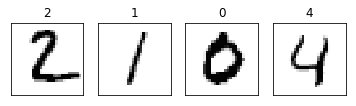

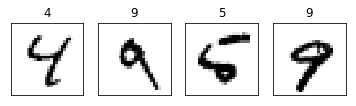

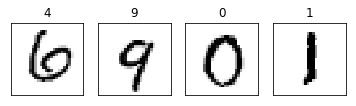

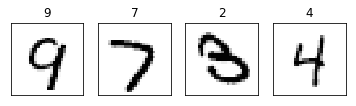

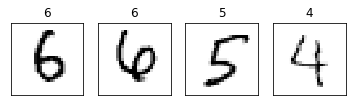

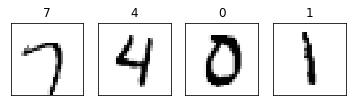

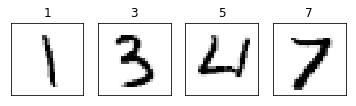

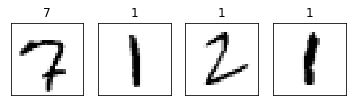

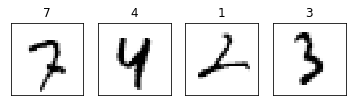

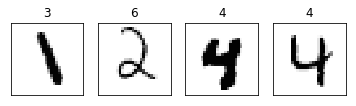

In [49]:
count = 0
tp = 0
error = 0
for x in range(len(xn)):
    f1 = plt.figure(1)
    argmax = []
    for i in range(0,10):
        argmax.append(np.dot(xn[x],X[i]))
    label       = argmax.index(max(argmax))
    if x < 50:
        im_vector   =  np.delete(xn[x], 0)
        im_matrix   = im_vector.reshape((size_row, size_col))
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

        count = count + 1

        if count == 1:
            plt.subplot(1, 4, 1)
        elif count == 2:
            plt.subplot(1, 4, 2)
        elif count == 3:
            plt.subplot(1, 4, 3)
        elif count == 4:
            plt.subplot(1, 4, 4)
        elif count == 5:
            plt.show()
            count = 0
    
    if list_label[x] == label:
        tp = tp + 1
    else:
        error = error + 1
    




In [50]:
print("true positive rate :" + str(tp/num_image))
print("error rate : " + str(error/num_image))

true positive rate :0.8602
error rate : 0.1398
